### Dataset
ID : Unique Identifier for a row

Gender: Gender of the Customer

Age : Age of the Customer (in Years)

Region_Code : Code of the Region for the customers

Occupation : Occupation Type for the customer

Channel_Code : Acquisition Channel Code for the Customer (Encoded)

Vintage : Vintage for the Customer (In Months), Number of Days, Customer has been associated with the company

Credit_Product : If the Customer has any active credit product (Home loan, Personal loan, Credit Card etc.)

Avg_Account_Balance : Average Account Balance for the Customer in last 12 Months

Is_Active : If the Customer is Active in last 3 Months

Is_Lead(Target) : If the Customer is interested for the Credit Card, 0 / 1: Customer is not interested / interested

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

In [2]:
df_train=pd.read_csv('train_credit.csv')
df_test=pd.read_csv('test_credit.csv')


In [3]:
train=df_train.copy()
test=df_test.copy()

In [4]:
df_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [5]:
df_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [6]:
#Credit_Product column has null values. Lets remoe them
df_train['Credit_Product']=df_train['Credit_Product'].fillna('NA')

In [7]:
df_test['Credit_Product']=df_test['Credit_Product'].fillna('NA')

In [8]:
df_test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [9]:
df_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [10]:
#Lets take a look at the categorical columns
columns=[ 'Gender', 'Region_Code', 'Occupation', 'Channel_Code',
        'Credit_Product', 'Is_Active','Is_Lead']
for i in columns:
    print("value counts of ",i,"is:")
    print(df_train[i].value_counts())
    print()
    print('Unique values of',i,'is:',df_train[i].unique())
    print()

value counts of  Gender is:
Male      134197
Female    111528
Name: Gender, dtype: int64

Unique values of Gender is: ['Female' 'Male']

value counts of  Region_Code is:
RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

Unique values of Region_Code is: ['RG268' 'RG277' 'RG270' 'RG282' 'RG261' 'RG265' 'RG283' 'RG254' 'RG269'
 'RG257' 'RG279' 'RG280' 'RG252' 'RG284' 'RG259' 'RG281' 'RG258' 'RG266'
 'RG260' 'RG274' 'RG256' 'RG275' 'RG273' 'RG267' 'RG272' 'RG251' 'RG262'
 'RG264' 'RG278' 'RG

As we can see the data is imbalanced

#### DAta Visualisation:

In [11]:
# defining funtion to represent graph

def with_hue(data,feature,ax):
    #Numnber of categories
    num_of_cat=len([x for x in df[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        hueBars=bars[ind:][::num_of_cat]
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        
        #Print percentages in bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100*bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                   ha="center",va="bottom",fontweight='bold',fontsize=14)
            
def without_hue(data,feature,ax):
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=14)


In [12]:
df=df_train.copy()

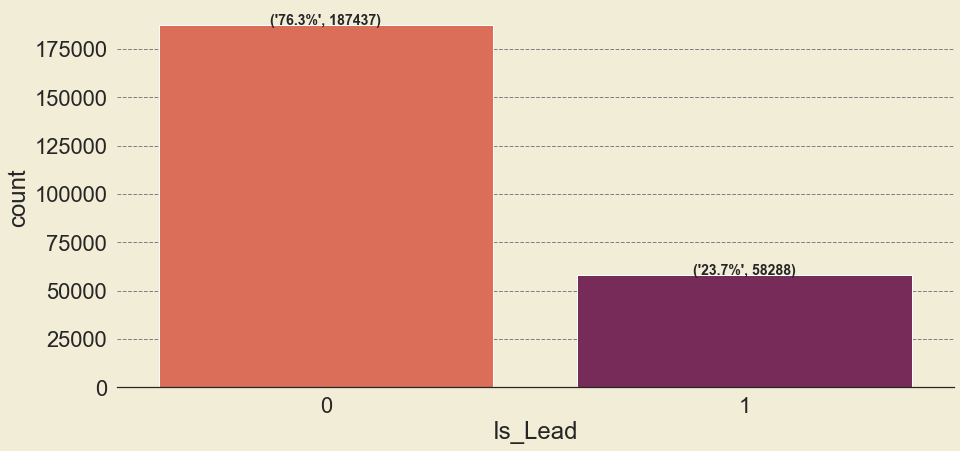

In [13]:
sns.set(context="notebook",style="white",font_scale=2)
fig=plt.figure(figsize=(15,7))

#Setting plot and background color
ax=plt.axes()
ax.set_facecolor("#F2EDD7FF") 
fig.patch.set_facecolor("#F2EDD7FF")
#Dealing with spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(linestyle="--",axis='y',color='gray')

a=sns.countplot(data=df,x='Is_Lead',palette='rocket_r')
without_hue(df,'Is_Lead',a)

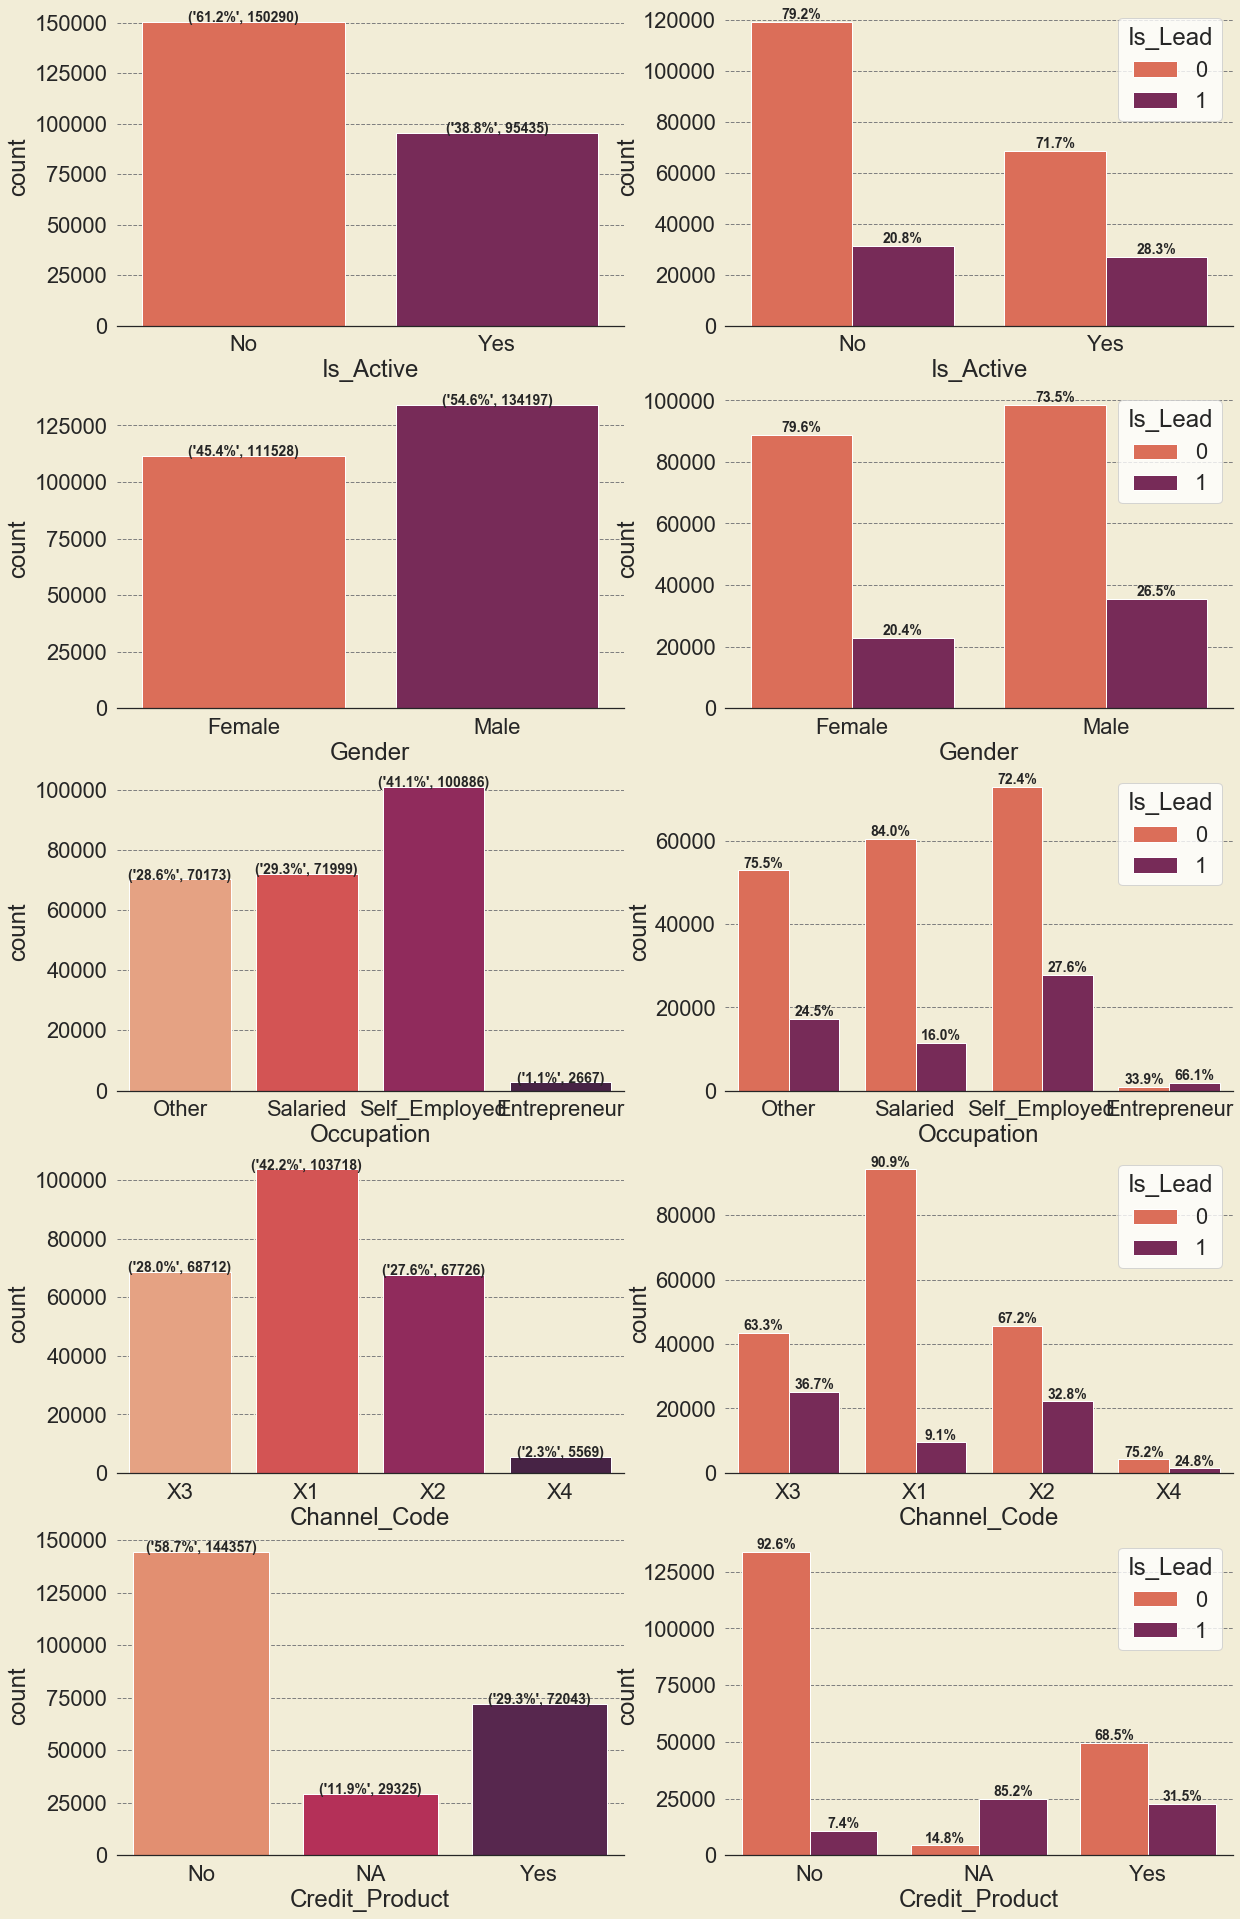

In [14]:
nrows=5
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,34))
columns=['Gender','Occupation', 'Channel_Code','Credit_Product', 'Is_Active']

f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i][j].set_facecolor('#F2EDD7FF')
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].grid(linestyle="--",axis='y',color='gray')
        
        if(j==0):
            a1=sns.countplot(data=df,x=columns[i-1],palette='rocket_r',ax=ax[i][j])
            without_hue(df,columns[i-1],a1)
        elif(j==1):
            a2=sns.countplot(data=df,x=columns[i-1],palette='rocket_r',ax=ax[i][j],hue="Is_Lead")
            with_hue(df,columns[i-1],a2)

Self employed and salaried people are less likely to get credit card whereas entrepreneurs though limited will get credit card 

People who already have credit product shows considerable interest comapritively to get credit card</b>

People in channel code X2 and X3 shows considereable interest comapritively</b>

The ratio of male getting credit card is slightly higher than female

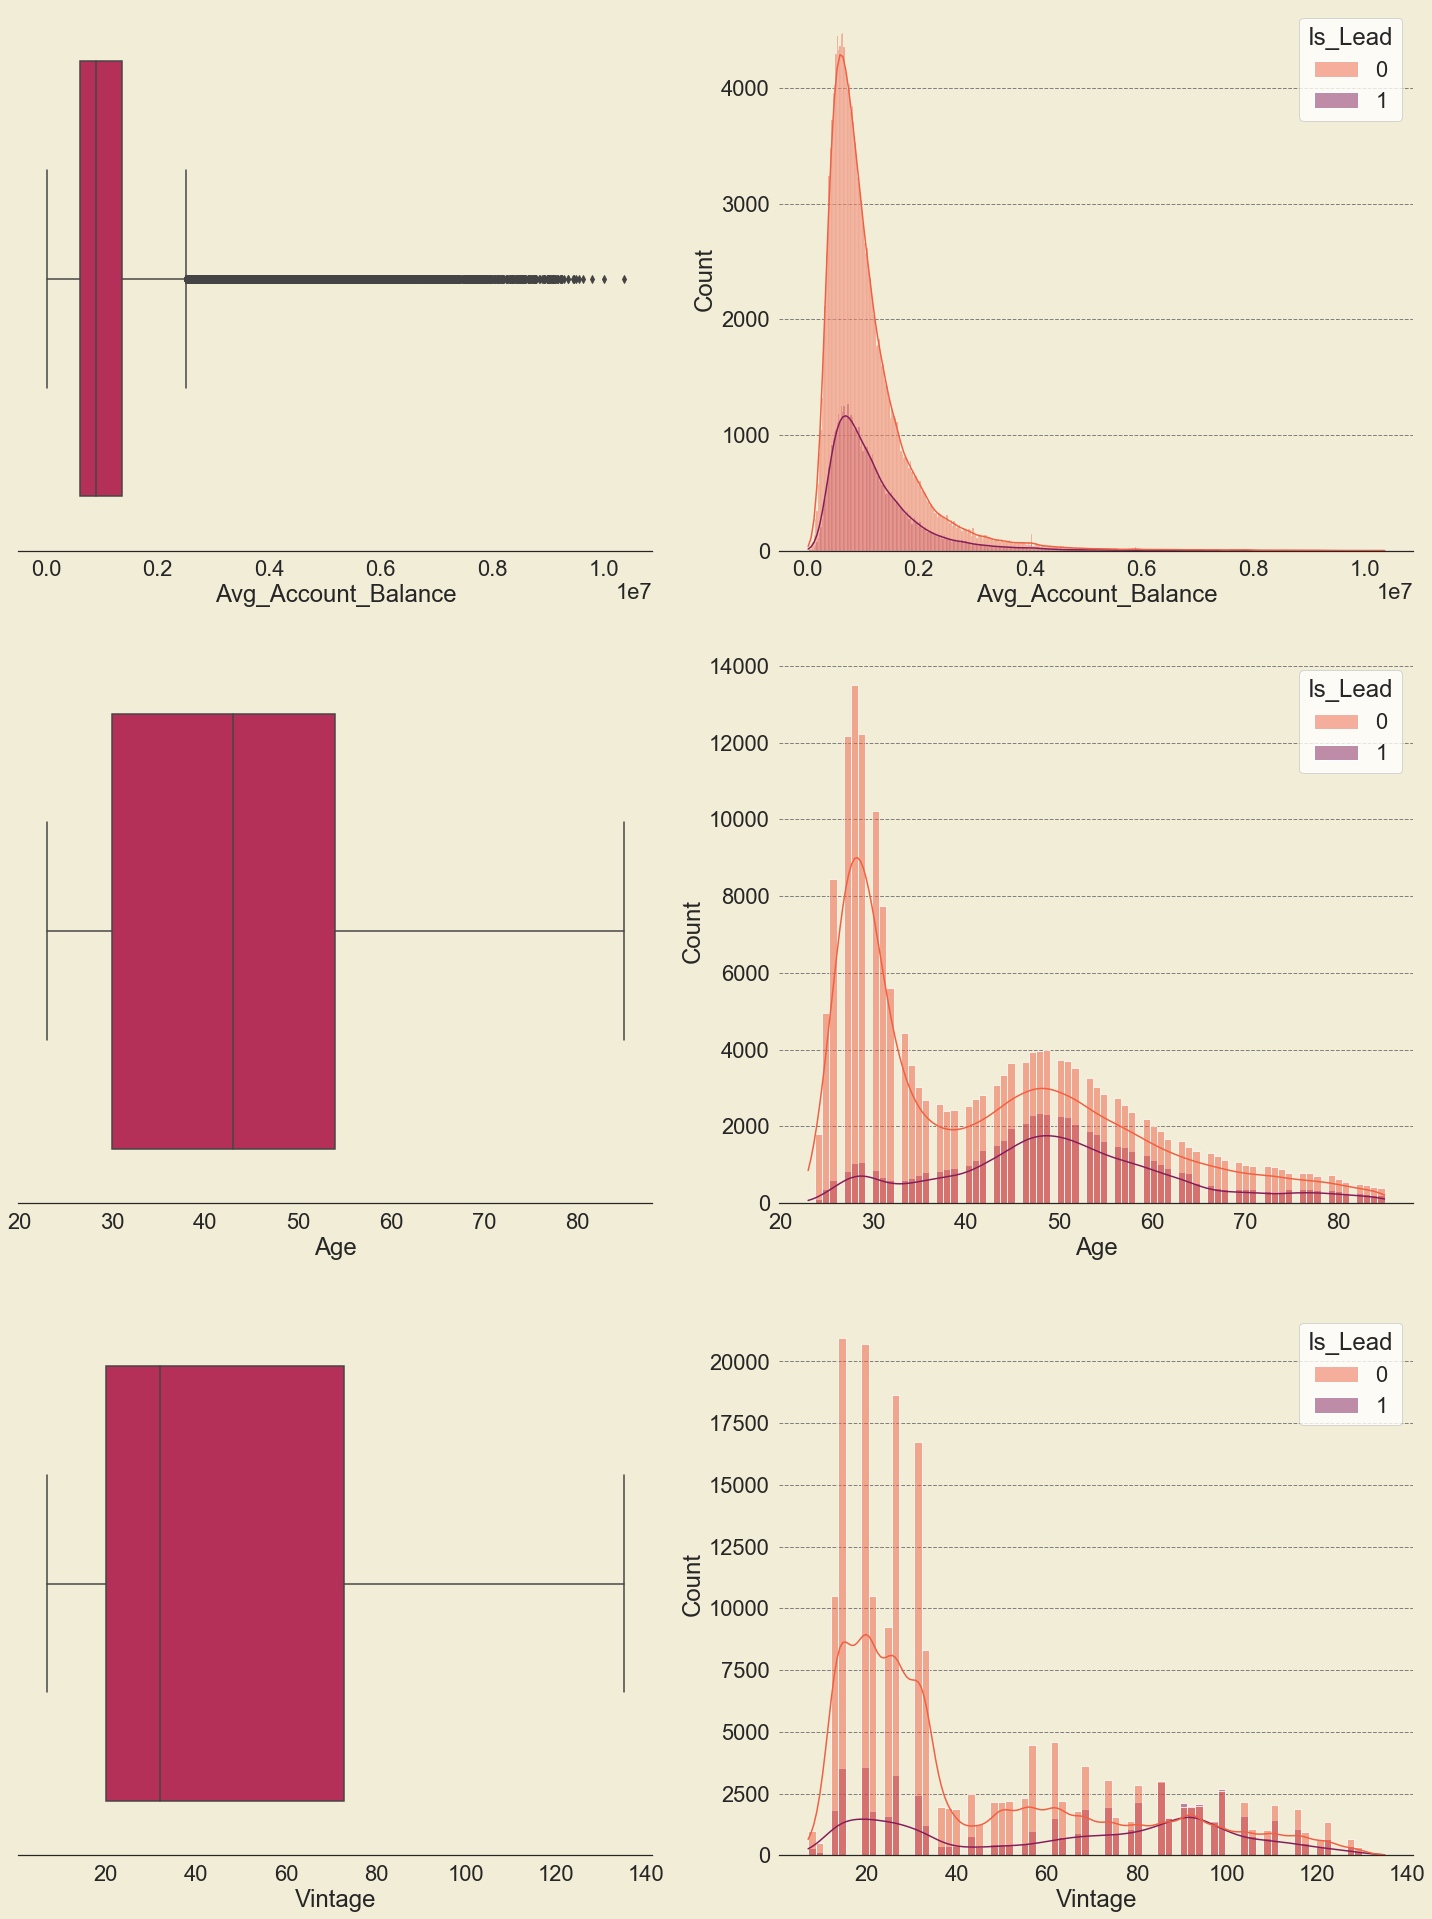

In [15]:
nrows=3
ncols=2
f,ax=plt.subplots(nrows=nrows,ncols=ncols,figsize=(25,34))
columns=["Age","Vintage","Avg_Account_Balance"]

f.patch.set_facecolor('#F2EDD7FF')

    #Setting background and foreground color
for i in range(0,nrows):
    for j in range(0,ncols):
        ax[i][j].set_facecolor('#F2EDD7FF')
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].grid(linestyle="--",axis='y',color='gray')
        
        if (j==0):
            a1=sns.boxplot(data=df,x=(df[columns[i-1]]),palette='rocket_r',ax=ax[i][j])
        elif (j==1):
            a2=sns.histplot(data=df,x=(df[columns[i-1]]),palette='rocket_r',ax=ax[i][j],hue='Is_Lead',kde=True)
        


There are outliers in avg account balance because many people have low account balance . So lets try taking log of it

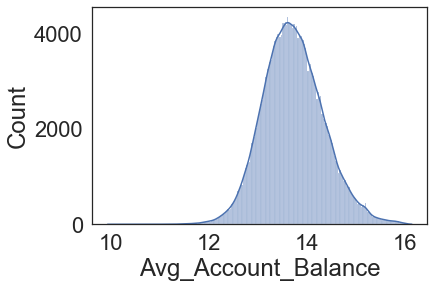

In [16]:
sns.histplot(data=df,x=np.log(df['Avg_Account_Balance']),palette='rocket_r',kde=True)

In [17]:
#Changing the distribution of 'Avg_Account_Balance' into Log Distribution
df['Avg_Account_Balance']=np.log(df['Avg_Account_Balance'])


In [18]:
df1=df.copy()

In [19]:
df["Is_Active"].replace(["Yes","No"],[1,0],inplace=True)
df_test["Is_Active"].replace(["Yes","No"],[1,0],inplace=True)

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
columns1=['Occupation', 'Channel_Code','Credit_Product']

cat_col=['Gender','Region_Code']

for col in cat_col:
    le.fit(df[col])
    df[col]= le.transform(df[col])
    

In [21]:
for col in cat_col:
    df_test[col]= le.transform(df_test[col])

In [22]:
df=pd.get_dummies(data=df,columns=columns1,drop_first=True)

In [23]:
df.head()

,ID,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes
0,NNVBBKZB,0,73,18,43,13.860193,0,0,1,0,0,0,1,0,1,0
1,IDD62UNG,0,30,27,32,13.274205,0,0,0,1,0,0,0,0,1,0
2,HD3DSEMC,0,56,18,26,14.210464,1,0,0,0,1,0,1,0,1,0
3,BF3NC7KV,1,34,20,19,13.061453,0,0,0,1,0,0,0,0,1,0
4,TEASRWXV,0,30,32,33,13.695360,0,0,0,1,0,0,0,0,1,0


In [24]:
df_test=pd.get_dummies(data=df_test,columns=columns1,drop_first=True)

In [27]:
df.drop('ID',axis=1,
        inplace=True)

In [28]:
df_test.drop('ID',axis=1,inplace=True)

#### Undersampling Imbalanced dataset

In [30]:
df_majority=df[df['Is_Lead']==0]
df_minority=df[df['Is_Lead']==1]

print(" The majority class values are", len(df_majority))
print(" The minority class values are", len(df_minority))
print(" The ratio of both classes are", len(df_majority)/len(df_minority))

 The majority class values are 187437
 The minority class values are 58288
 The ratio of both classes are 3.215704776283283


In [33]:
X = df.drop(columns=['Is_Lead'])
y = df[["Is_Lead"]]

In [35]:
from sklearn import metrics
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.metrics import auc
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [47]:
from sklearn.model_selection import cross_val_score,train_test_split , StratifiedKFold

In [36]:
#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_X = pd.DataFrame(sc.fit_transform(X),columns=X.columns)

In [39]:
#defining a function to find fit of the model

def max_accuracy_scr(names,model_c,df_xc,yc):
    accuracy_scr_max = 0
    roc_scr_max=0
    train_xc,test_xc,train_yc,test_yc = train_test_split(df_X,y,random_state = 42,test_size = 0.2,stratify =y)
    model_c.fit(train_xc,train_yc)
    pred = model_c.predict_proba(test_xc)[:, 1]
    roc_score = roc_auc_score(test_yc, pred)
    accuracy_scr = accuracy_score(test_yc,model_c.predict(test_xc))
    if roc_score> roc_scr_max:
        roc_scr_max=roc_score
        final_model = model_c
        mean_acc = cross_val_score(final_model,df_X,y,cv=5,scoring="accuracy").mean()
        std_dev = cross_val_score(final_model,df_X,y,cv=5,scoring="accuracy").std()
        cross_val = cross_val_score(final_model,df_X,y,cv=5,scoring="accuracy")
    print("*"*50)
    print("Results for model : ",names,'\n',
          "max roc score correspond to random state " ,roc_scr_max ,'\n',
          "Mean accuracy score is : ",mean_acc,'\n',
          "Std deviation score is : ",std_dev,'\n',
          "Cross validation scores are :  " ,cross_val) 
    print(f"roc_auc_score: {roc_score}")
    print("*"*50)

In [40]:
#Now by using multiple Algorithms we are calculating the best Algo which performs best for our data set 
accuracy_scr_max = []
models=[]
#accuracy=[]
std_dev=[]
roc_auc=[]
mean_acc=[]
cross_val=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('Decision Tree Classifier',DecisionTreeClassifier()))
models.append(("GausianNB",GaussianNB()))

for names,model_c in models:
    max_accuracy_scr(names,model_c,df_X,y)



**************************************************
Results for model :  Logistic Regression 
 max roc score correspond to random state  0.8579158267860988 
 Mean accuracy score is :  0.8533767422932138 
 Std deviation score is :  0.00029860919854055517 
 Cross validation scores are :   [0.85292502 0.85318954 0.85369824 0.85337267 0.85369824]
roc_auc_score: 0.8579158267860988
**************************************************
**************************************************
Results for model :  Random Forest 
 max roc score correspond to random state  0.8555220421743688 
 Mean accuracy score is :  0.8519564553871197 
 Std deviation score is :  0.001762541256454174 
 Cross validation scores are :   [0.85227388 0.85235528 0.85009665 0.8506257  0.85422729]
roc_auc_score: 0.8555220421743688
**************************************************
**************************************************
Results for model :  Decision Tree Classifier 
 max roc score correspond to random state  0.7063451

In [41]:
from sklearn.neighbors import KNeighborsClassifier



In [44]:
x_train,x_test,y_train,y_test=train_test_split(df_X,y,test_size=0.3,random_state=42)

In [49]:
def objective(trial):
    
    #n_estimators = trial.suggest_int('n_estimators', 2, 200)
    n_neighbors = int(trial.suggest_int('n_neighbors', 2,50))
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

    return cross_val_score(clf, x_train, y_train, 
           n_jobs=2, cv=cv,scoring='roc_auc').mean()


In [50]:
study = optuna.create_study(direction='maximize',study_name='KNN')
study.optimize(objective, n_trials=15)


[I 2021-11-27 13:42:59,265] A new study created in memory with name: KNN
[I 2021-11-27 13:46:09,883] Trial 0 finished with value: 0.8627041539692921 and parameters: {'n_neighbors': 39}. Best is trial 0 with value: 0.8627041539692921.
[I 2021-11-27 13:48:18,687] Trial 1 finished with value: 0.8352159358608764 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 0.8627041539692921.
[I 2021-11-27 13:51:12,793] Trial 2 finished with value: 0.861787761649208 and parameters: {'n_neighbors': 34}. Best is trial 0 with value: 0.8627041539692921.
[I 2021-11-27 13:53:34,276] Trial 3 finished with value: 0.8508086837332067 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.8627041539692921.
[I 2021-11-27 13:56:42,608] Trial 4 finished with value: 0.8635462836801466 and parameters: {'n_neighbors': 46}. Best is trial 4 with value: 0.8635462836801466.
[I 2021-11-27 13:59:42,731] Trial 5 finished with value: 0.8627041539692921 and parameters: {'n_neighbors': 39}. Best is tri

In [51]:
trial = study.best_trial
print('## best_values -->',trial.value)
print("## best_parameters -->",trial.params)


## best_values --> 0.8638956614065748
## best_parameters --> {'n_neighbors': 50}


In [55]:
model_k=KNeighborsClassifier(n_neighbors=50)

In [56]:
model_k.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [57]:
y_pred_k=model_k.predict_proba(x_test)[:,1]


In [58]:
print(roc_auc_score(y_test,y_pred_k))

0.8619996732190776


XGBoost Classifier:

In [59]:
import xgboost as xg
from xgboost import XGBClassifier
from sklearn.utils import class_weight

In [61]:
clf2 = xg.XGBClassifier(class_weight='balanced').fit(x_train, y_train)
class_weight.compute_class_weight('balanced', np.unique(y_train), y_train["Is_Lead"])
xg_pred = clf2.predict(x_test)


[15:27:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:27:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


 ROC_AUC score is  0.8693643842270864
accuracy score is :  0.8596136628774519
Precision is :  0.7867688584106495
Recall is:  0.5585977775231985
F1 Score is :  0.653334673232171
classification report 
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     56260
           1       0.79      0.56      0.65     17458

    accuracy                           0.86     73718
   macro avg       0.83      0.76      0.78     73718
weighted avg       0.85      0.86      0.85     73718



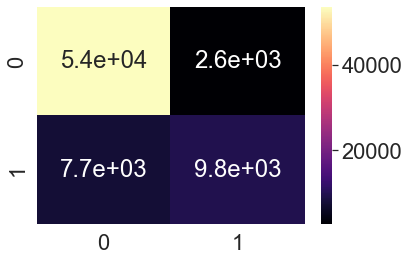

In [63]:
#XG Boost Results
xg_pred_2=clf2.predict_proba(x_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(y_test,xg_pred_2,pos_label=True)
auc = roc_auc_score(y_test,xg_pred_2)

print(" ROC_AUC score is ",auc)
print("accuracy score is : ",accuracy_score(y_test,xg_pred))
print("Precision is : " ,precision_score(y_test, xg_pred))
print("Recall is: " ,recall_score(y_test, xg_pred))
print("F1 Score is : " ,f1_score(y_test, xg_pred))
print("classification report \n",classification_report(y_test,xg_pred))

cnf = confusion_matrix(y_test,xg_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

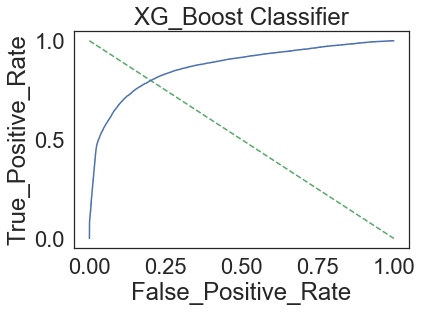

In [64]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("XG_Boost Classifier")
plt.show()

In [70]:
#Trying stratification modeling
from sklearn.model_selection import KFold, StratifiedKFold

def cross_val(X, y, model, params, folds=10):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

        model_c= model(**params)
        model_c.fit(x_train, y_train,eval_set=[(x_test, y_test)],early_stopping_rounds=100, verbose=300)

        pred_y = model_c.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred_y)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return model_c

In [71]:
#Applying LGBM Model with 10 stratified cross-folds
from lightgbm import LGBMClassifier

lgb_params= {'learning_rate': 0.045, 'n_estimators': 10000,'max_bin': 84,'num_leaves': 10,'max_depth': 20,'reg_alpha': 8.457,'reg_lambda': 6.853,'subsample': 0.749}
lgb_model = cross_val(X, y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[300]	valid_0's binary_logloss: 0.341919
[600]	valid_0's binary_logloss: 0.341858
Early stopping, best iteration is:
[505]	valid_0's binary_logloss: 0.341795
roc_auc_score: 0.8744284578110229
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[300]	valid_0's binary_logloss: 0.341445
Early stopping, best iteration is:
[369]	valid_0's binary_logloss: 0.341375
roc_auc_score: 0.8766287524582922
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[300]	valid_0's binary_logloss: 0.345532
[600]	valid_0's binary_logloss: 0.345256
[900]	valid_0's binary_logloss: 0.345223
Early stopping, best iteration is:
[802]	valid_0's binary_logloss: 0.345198
roc_auc_score: 0.8738777697820813
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 10

accuracy score is :  0.8590710545592664
Precision is :  0.7915532458962303
Recall is:  0.5496620460533853
F1 Score is :  0.6487948345221596
 ROC_AUC score is  0.8713258868157785
classification report 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     56260
           1       0.79      0.55      0.65     17458

    accuracy                           0.86     73718
   macro avg       0.83      0.75      0.78     73718
weighted avg       0.85      0.86      0.85     73718



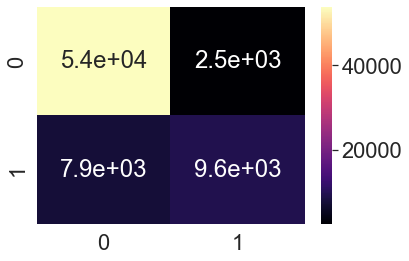

In [81]:
#LGBM results:
lgb_pred_2=lgb_model.predict_proba(x_test)[:,1]
Fpr,Tpr,thresholds = roc_curve(y_test,lgb_pred_2,pos_label=True)
auc = roc_auc_score(y_test,lgb_pred_2)



lgb_model.fit(x_train,y_train)
lgb_pred=lgb_model.predict(x_test)
print("accuracy score is : ",accuracy_score(y_test,lgb_pred))
print("Precision is : " ,precision_score(y_test, lgb_pred))
print("Recall is: " ,recall_score(y_test, lgb_pred))
print("F1 Score is : " ,f1_score(y_test, lgb_pred))
print(" ROC_AUC score is ",auc)
print("classification report \n",classification_report(y_test,lgb_pred))

cnf = confusion_matrix(y_test,lgb_pred)
sns.heatmap(cnf, annot=True, cmap = "magma")

Our final model will be LGBM with stratified KFold of roc_auc_score 0.871

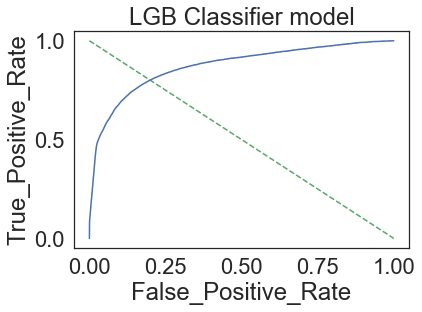

In [83]:
#plotting the graph for area under curve for representing accuracy of data
plt.plot([0,1],[1,0],'g--')
plt.plot(Fpr,Tpr)
plt.xlabel('False_Positive_Rate')
plt.ylabel('True_Positive_Rate')
plt.title("LGB Classifier model")
plt.show()

In [84]:
df_test.head()

,Gender,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product_No,Credit_Product_Yes
0,1,29,4,25,742366,0,1,0,0,0,0,0,0,1
1,1,43,18,49,925537,0,1,0,0,1,0,0,0,0
2,1,31,20,14,215949,0,0,1,0,0,0,0,1,0
3,1,29,22,33,868070,0,1,0,0,0,0,0,1,0
4,0,29,20,19,657087,0,1,0,0,0,0,0,1,0


In [85]:
#Standardizing value of x by using standardscaler to make the data normally distributed
sc = StandardScaler()
df_test= pd.DataFrame(sc.fit_transform(df_test),columns=df_test.columns)

In [87]:
lead_pred_lgb=lgb_model.predict_proba(df_test)[:,1]

In [88]:
lead_pred_lgb= pd.DataFrame(lead_pred_lgb,columns=["Is_Lead"])

In [89]:
lead_pred_lgb

,Is_Lead
0,0.053006
1,0.886015
2,0.057884
3,0.026437
4,0.024395
...,...
105307,0.995158
105308,0.697693
105309,0.052241
105310,0.211863
